In [4]:
import pandas as pd
import random
import matplotlib.pyplot as plt

In [5]:
path_example = '../Bert-Multi-Label-Text-Classification/pybert/dataset/train_sample.csv'

In [6]:
# pd.read_csv(path_example)

In [7]:
# convert hube data
bias_file_path = '../cs7650_project_data/statements_biased'
neutral_file_path = '../cs7650_project_data/statements_neutral_featured'

In [8]:
statements_biased = []
with open(bias_file_path) as f:
    for line in f:
        statements_biased.append(line.rstrip())
print('biased count:', len(statements_biased))

biased count: 1843


In [9]:
statements_neutral = []
with open(neutral_file_path) as f:
    for line in f:
        statements_neutral.append(line.rstrip())
print('neutral_count',len(statements_neutral))

neutral_count 5000


## sample neutral sentences to have same count as biased statements

In [10]:
n_choice = len(statements_biased)
statements_neutral_short = random.sample(statements_neutral,k=n_choice)

(array([ 295.,  989., 1109.,  629.,  372.,  154.,   72.,   40.,   21.,
           5.]),
 array([ 3. , 11.5, 20. , 28.5, 37. , 45.5, 54. , 62.5, 71. , 79.5, 88. ]),
 <a list of 10 Patch objects>)

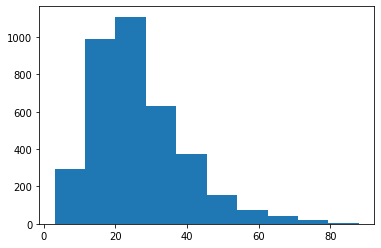

In [11]:
tmp = statements_neutral_short[:]
tmp.extend(statements_biased)
plt.hist(list(map(lambda x: len(x.split()),tmp)))

Randomly mix biased and neutral statement together with 0 as neutral and 1 as biased

In [12]:
data_pairs = list(zip(statements_biased,[1]*n_choice))
data_pairs.extend(list(zip(statements_neutral_short, [0]*n_choice)))
random.shuffle(data_pairs)

## make csv file

In [13]:
# split train test pairs
n_train = 2*n_choice
split = int(.9*n_train)
print('split:',split)

split: 3317


In [14]:
df = pd.DataFrame(columns=["id","text","biasness",'dummy1','dummy2','dummy3','dummy4','dummy5'])
df_test = pd.DataFrame(columns=["id","text","biasness",'dummy1','dummy2','dummy3','dummy4','dummy5'])

In [15]:
## make sytle consistant with Bert Code required, 6 columns for features
for i in range(n_train):
    if i < split:
        item = [i,data_pairs[i][0],data_pairs[i][1]]
        item.extend(random.choices([0,1],k=5))
        df.loc[i,] = item
    else:
        item = [i,data_pairs[i][0],data_pairs[i][1]]
        item.extend(random.choices([0,1],k=5))
        df_test.loc[i-split,] = item

In [17]:
df.to_csv('../Bert-Multi-Label-Text-Classification/pybert/dataset/train_sample.csv',index=False)

In [76]:
df_test.to_csv('./Bert-Multi-Label-Text-Classification/pybert/dataset/test.csv',index=False)

In [74]:
df

,id,text,biasness,dummy1,dummy2,dummy3,dummy4,dummy5
0,0,Sedona's main attraction is its stunning array...,1,1,1,1,0,1
1,1,David Matthew Hicks (born 7 August 1975) is an...,1,1,0,0,0,1
2,2,The plates enable the whale to filter feed.,0,0,0,1,1,1
3,3,"In the mandible (lower jaw), the mental forame...",0,1,1,1,1,1
4,4,"Technically, however, the millennium began in ...",1,0,1,0,0,1
...,...,...,...,...,...,...,...,...
3312,3312,Brownlee refused to grant permission for the m...,0,0,1,1,1,1
3313,3313,"Philip Brasor, editor of ""The Japan Times"", ex...",0,1,1,1,0,1
3314,3314,"In 2004, a television crew recorded Spanish co...",1,0,0,1,0,1
3315,3315,McCarthy responded to the tragedy by launching...,1,0,1,1,1,0


In [75]:
df_test

,id,text,biasness,dummy1,dummy2,dummy3,dummy4,dummy5
0,3317,The song is also the topic of Italian poet Gio...,0,0,0,1,0,0
1,3318,"As a survival horror game, ""Resident Evil 2"" f...",0,1,0,0,0,0
2,3319,"Morris said that even without Curtis's death, ...",0,0,1,1,1,0
3,3320,Florida Governor Jeb Bush declared a state of ...,1,1,1,1,0,0
4,3321,In several countries outside the United Kingdo...,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...
364,3681,"The singular power, the singular originality a...",1,0,0,1,1,0
365,3682,"Liberia, whose name means ""land of the free,"" ...",1,0,1,0,0,1
366,3683,"Harry Dexter White, regarded by many as the pr...",1,1,0,1,0,0
367,3684,"By then, he had been praised by both Gates and...",0,0,1,0,1,1


## Process AAAI 20 biased data

In [82]:
len(pairs_full)

181496

In [ ]:
n_